In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
import numpy as np
import os
import math
import shutil
import glob
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [5]:
# The number of images in the folders Classes yes and no
ROOT_DIR = "./brain_tumor_dataset/"
num_img = {}

for dir in os.listdir(ROOT_DIR):
    num_img[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

num_img

{'no': 8, 'yes': 7}

SPlit as 70 for train, 15 - validation and 15 for test


In [6]:
if not os.path.exists("./train"):
    os.mkdir("./train")

for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/" + dir)
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(0.7*num_img[dir])-2),replace= False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./train",dir)
        shutil.copy(O,D)
        os.remove(O)

else :
    print("Path exists")


FileExistsError: [WinError 183] Cannot create a file when that file already exists: './train/no'

In [ ]:
def MakeFolder(p,split):
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
        os.makedirs("./"+p+"/"+dir)
        for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(split*num_img[dir])-2),replace= False):
            O = os.path.join(ROOT_DIR,dir,img)
            D = os.path.join("./"+p,dir)
            shutil.copy(O,D)
            os.remove(O)

    else :
        print("Path exists")


In [ ]:
MakeFolder("val",0.15)

In [ ]:
MakeFolder("test",0.15)

In [ ]:
#Neural Network
#Make the model and add convulution layers and add Maxpool function
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape = (224,224,3)))
model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#Specify Dropout rate to avoid overfitting
model.add(Dropout(rate=0.25))
#Flatten the image to desired dimensions
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()


In [ ]:
model.compile(optimizer='adam',loss= keras.losses.binary_crossentropy,metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
#Data generation

def Convert(path):
    image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
    i = image_data.flow_from_directory(directory=path,target_size=(224,224), batch_size=32, class_mode='binary')
    return i


In [ ]:
path = "./train"
train_data = Convert(path)

In [ ]:
def Convert_for_Validation(path):
    image_data = ImageDataGenerator(rescale=1/255)
    i = image_data.flow_from_directory(directory=path,target_size=(224,224), batch_size=32, class_mode='binary')
    return i

In [ ]:
path = "./test"
test_data = Convert_for_Validation(path)

In [ ]:
path = "./val"
val_data = Convert_for_Validation(path)


In [ ]:
stop = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= 70, verbose= 1, mode="auto")

check = ModelCheckpoint(monitor="val_accuracy",filepath="./best.h5",verbose=1, save_best_only= True, mode="auto")
call = [stop,check]


In [ ]:
#Training the model
his = model.fit_generator(generator=train_data,steps_per_epoch=8,epochs=7, verbose=1, validation_data=val_data, validation_steps=20, callbacks=call)


Epoch 1/7
8/8 [==============================] - 5s 624ms/step - loss: 0.3628 - accuracy: 0.8430 - val_loss: 0.6159 - val_accuracy: 0.8182

Epoch 00001: val_accuracy did not improve from 0.81818


In [8]:
acc = model.evaluate_generator(test_data)[1]
print(f"the accuracy is {acc*100} %")



NameError: name 'model' is not defined

The chance of tumor is 19.28578019142151%


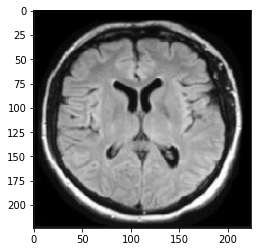

In [ ]:
path = "./brain_tumor_dataset/no/N2.JPG"

img  = load_img(path, target_size=(224,224))
arr = img_to_array(img)/255
arr.shape

arr = np.expand_dims(arr,axis=0)
pred = model.predict(arr)[0][0]
print(f"The chance of tumor is {pred*100}%")
plt.imshow(img)
plt.show()

In [ ]:
from keras.models import load_model
m1 = load_model("./best.h5")